In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
SBA_clean = pd.read_csv('SBA_clean.csv')
SBA_clean.head()

,Unnamed: 0,LoanNr_ChkDgt,City,State,Zip,Sector,ApprovalDate,ApprovalFY,Term,NoEmp,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,RealEstate,Recession,SectorRate
0,0,1000014003,EVANSVILLE,IN,47711,45,1997-02-28,1997,84,4,...,1999-02-28,60000.0,0.0,0.0,0.0,60000.0,48000.0,0,0,0.23
1,1,1000024006,NEW PARIS,IN,46526,72,1997-02-28,1997,60,2,...,1997-05-31,40000.0,0.0,0.0,0.0,40000.0,32000.0,0,0,0.22
2,2,1000034009,BLOOMINGTON,IN,47401,62,1997-02-28,1997,180,7,...,1997-12-31,287000.0,0.0,0.0,0.0,287000.0,215250.0,0,0,0.10
3,5,1000084002,PLAINVILLE,CT,6062,33,1997-02-28,1997,120,19,...,1997-06-30,517000.0,0.0,0.0,0.0,517000.0,387750.0,0,0,0.14
4,7,1000094005,SUMMERFIELD,FL,34491,81,1997-02-28,1997,84,1,...,1998-06-30,45000.0,0.0,0.0,0.0,45000.0,36000.0,0,0,0.20


In [5]:
SBA_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439120 entries, 0 to 439119
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         439120 non-null  int64  
 1   LoanNr_ChkDgt      439120 non-null  int64  
 2   City               439120 non-null  object 
 3   State              439120 non-null  object 
 4   Zip                439120 non-null  int64  
 5   Sector             439120 non-null  int64  
 6   ApprovalDate       439120 non-null  object 
 7   ApprovalFY         439120 non-null  int64  
 8   Term               439120 non-null  int64  
 9   NoEmp              439120 non-null  int64  
 10  NewExist           439120 non-null  float64
 11  IsCreatedJob       439120 non-null  int64  
 12  IsRetainedJob      439120 non-null  int64  
 13  IsFranchised       439120 non-null  int64  
 14  UrbanRural         439120 non-null  int64  
 15  RevLineCr          439120 non-null  float64
 16  Lo

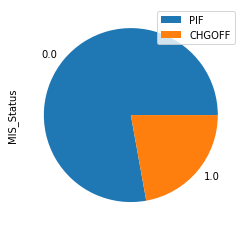

In [9]:
SBA_clean['MIS_Status'].value_counts(normalize=True).plot(kind='pie')
plt.legend(["PIF", "CHGOFF"], loc= 0)
plt.show()

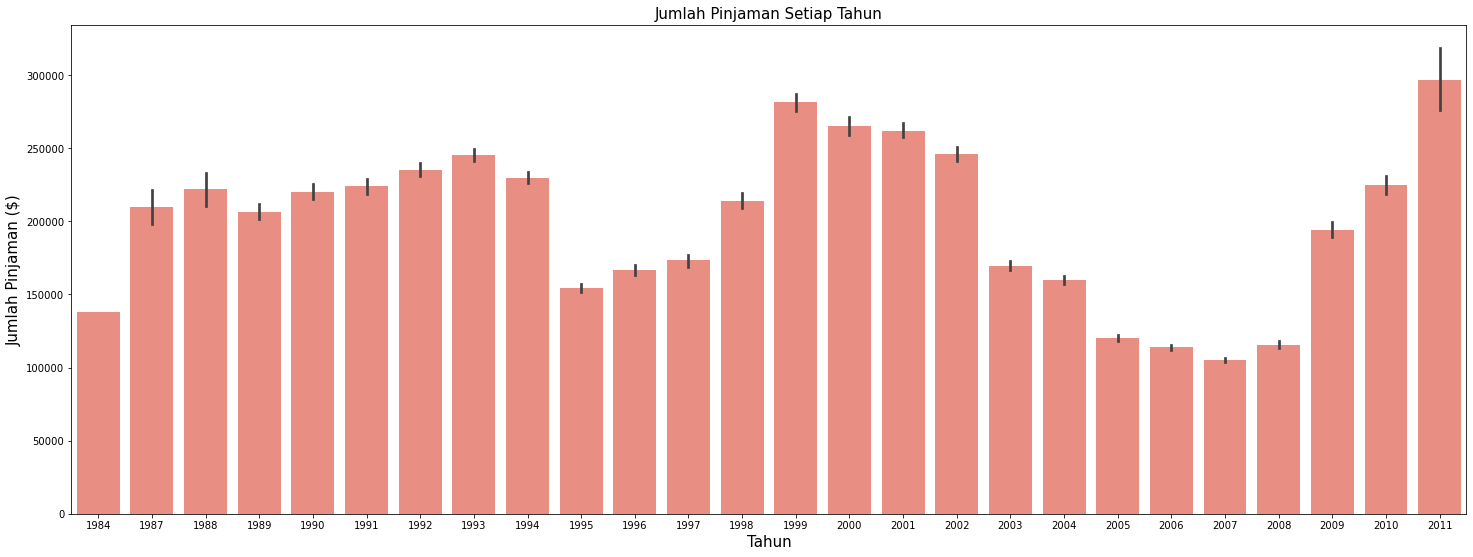

In [4]:
# Barplot jumlah pinjaman setiap tahunnya

plt.figure(figsize=(25,9))
sns.barplot(x = SBA_clean['ApprovalFY'], y = SBA_clean['DisbursementGross'], color = 'Salmon')
plt.title('Jumlah Pinjaman Setiap Tahun', size = 15)
plt.xlabel('Tahun', size = 15)
plt.ylabel('Jumlah Pinjaman ($)', size = 15)
plt.show()

In [5]:
# Tahun 2007 - 2009 ada peningkatan jumlah pinjaman (Saat resesi ekonomi banyak yang memerlukan pinjaman)

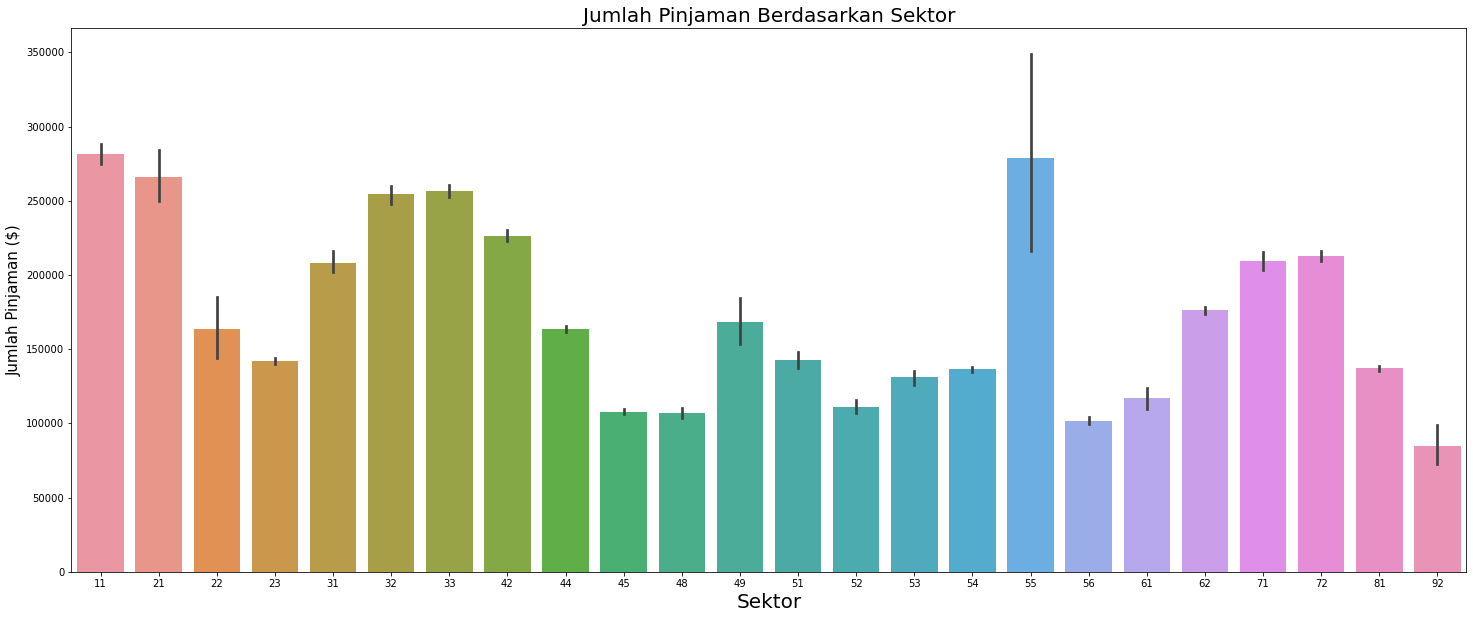

In [6]:
# Barplot jumlah pinjaman berdasarkan sektornya
plt.figure(figsize = (25, 10))
sns.barplot(x = SBA_clean["Sector"], y = SBA_clean["DisbursementGross"])
plt.title('Jumlah Pinjaman Berdasarkan Sektor', fontsize = 20)
plt.xlabel('Sektor', fontsize = 20)
plt.ylabel('Jumlah Pinjaman ($)', fontsize = 15)
plt.show() 

In [7]:
# Jumlah pinjaman paling banyak adalah dari sektor 11, yaitu Agriculture, foresty, fishing, and hunting
# Jumlah pinjaman paling sedikit adalah dari sektor 92, yaitu Public Administration

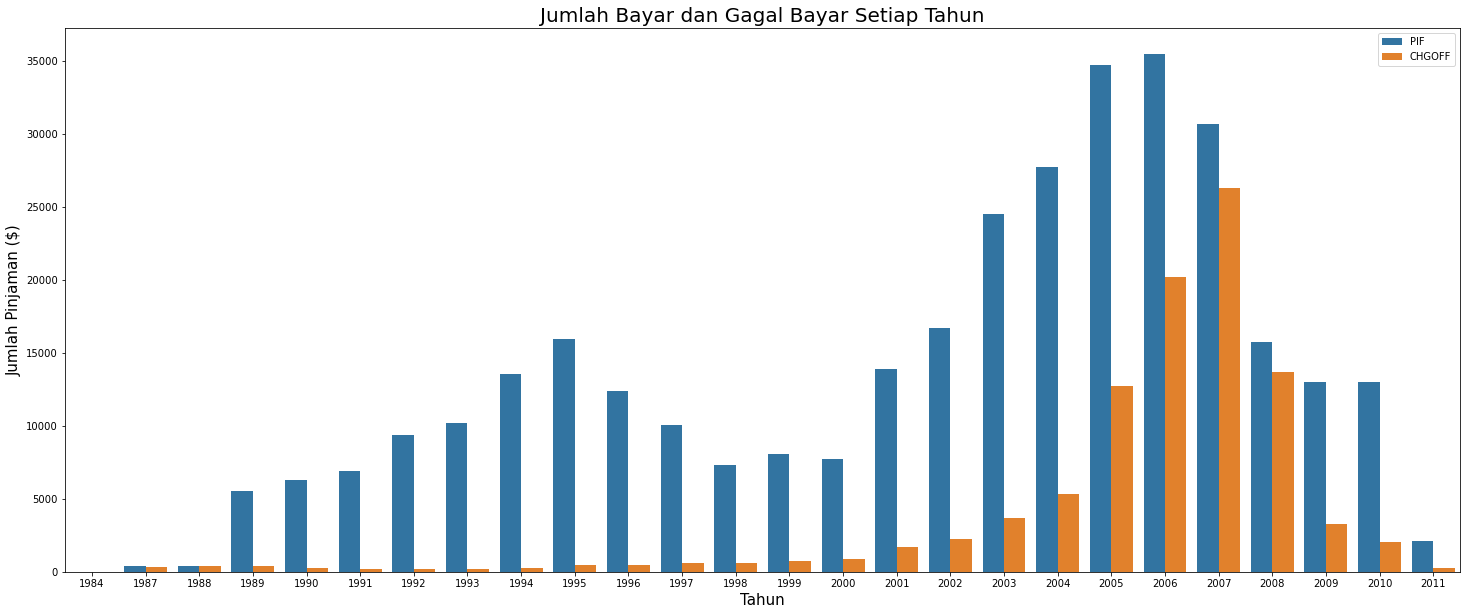

In [10]:
plt.figure(figsize = (25, 10))
sns.countplot(x = SBA_clean["ApprovalFY"], hue = SBA_clean['MIS_Status'])
plt.title('Jumlah Bayar dan Gagal Bayar Setiap Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Pinjaman ($)', fontsize=15)
plt.legend(["PIF", "CHGOFF"], loc= 0)
plt.show()

In [9]:
# Ada peningkatan gagal bayar mulai tahun 2006 - 2008.
# Dikarenakan saat itu sedang resesi, sehingga banyak pengusaha atau bisnis yang gagal bayar

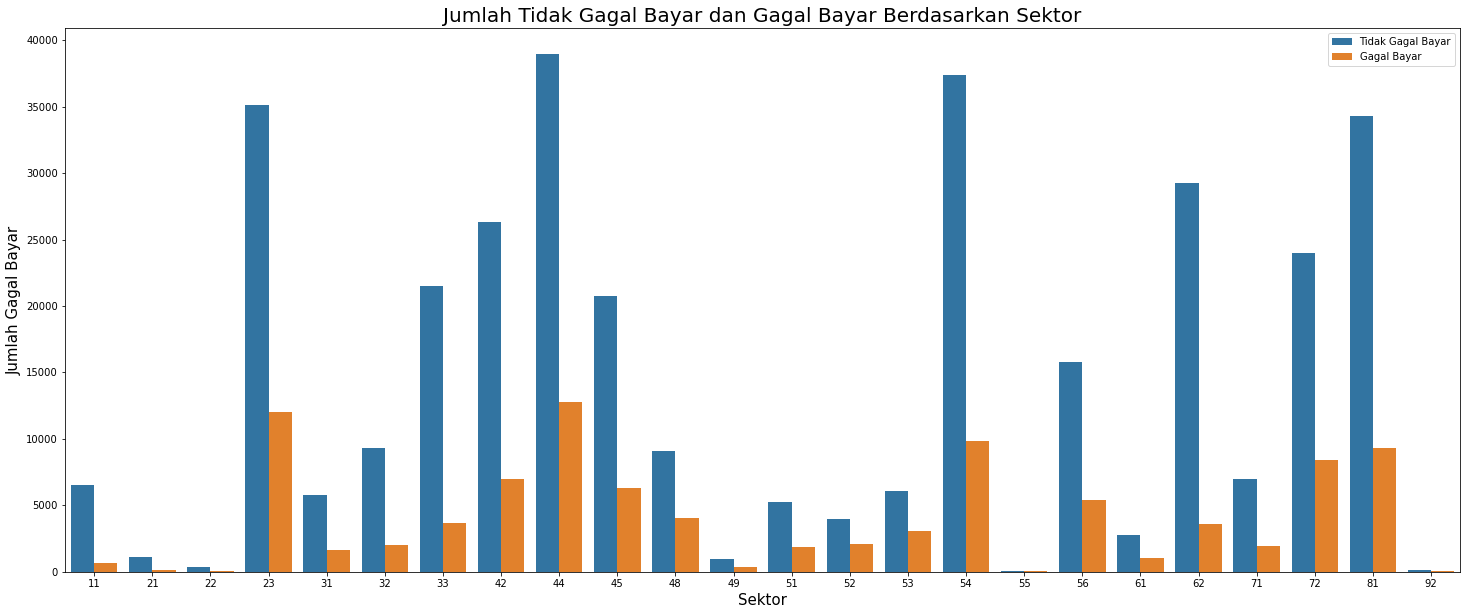

In [10]:
# Jumlah bayar dan gagal bayar pada setiap sektor

plt.figure(figsize = (25, 10))
sns.countplot(x = SBA_clean["Sector"], hue = SBA_clean['MIS_Status'])
plt.title('Jumlah Tidak Gagal Bayar dan Gagal Bayar Berdasarkan Sektor', fontsize=20)
plt.xlabel('Sektor', fontsize=15)
plt.ylabel('Jumlah Gagal Bayar', fontsize=15)
plt.legend(["Tidak Gagal Bayar", "Gagal Bayar"], loc= 0)
plt.show()

In [11]:
# 44 paling banyak yang gagal bayar dan tidak gagal bayar, yaitu Retail Trade

In [12]:
pd.crosstab(SBA_clean['Sector'], SBA_clean['MIS_Status'], normalize=0)

MIS_Status,0.0,1.0
Sector,,
11,0.908990,0.091010
21,0.907363,0.092637
22,0.809179,0.190821
23,0.744479,0.255521
31,0.781750,0.218250
32,0.824219,0.175781
33,0.853829,0.146171
42,0.789381,0.210619
44,0.753452,0.246548


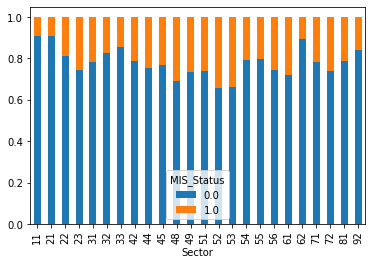

In [13]:
pd.crosstab(SBA_clean['Sector'], SBA_clean['MIS_Status'], normalize=0).plot(kind='bar', stacked=True)

In [14]:
# Jumlah Perusahaan aktif dan tidak aktif saat resesi berdasarkan sektor

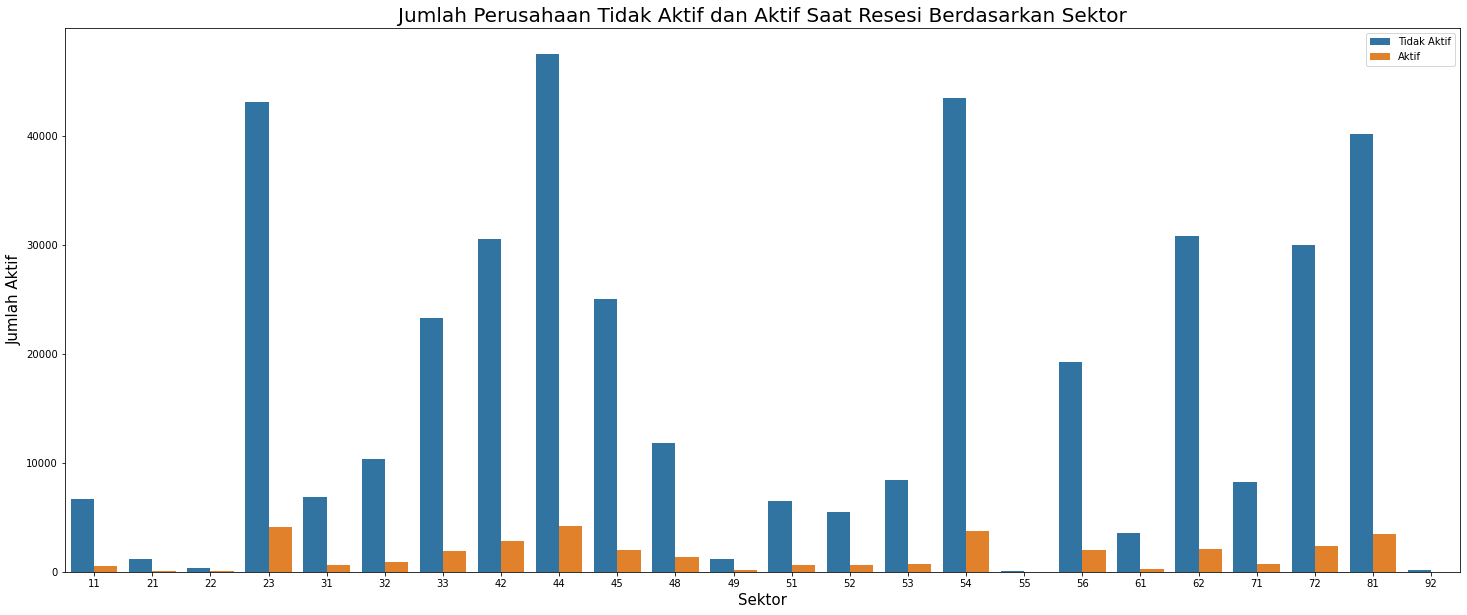

In [15]:
plt.figure(figsize = (25, 10))
sns.countplot(x = SBA_clean["Sector"], hue = SBA_clean['Recession'])
plt.title('Jumlah Perusahaan Tidak Aktif dan Aktif Saat Resesi Berdasarkan Sektor', fontsize=20)
plt.xlabel('Sektor', fontsize=15)
plt.ylabel('Jumlah Aktif', fontsize=15)
plt.legend(["Tidak Aktif", "Aktif"], loc= 0)
plt.show()

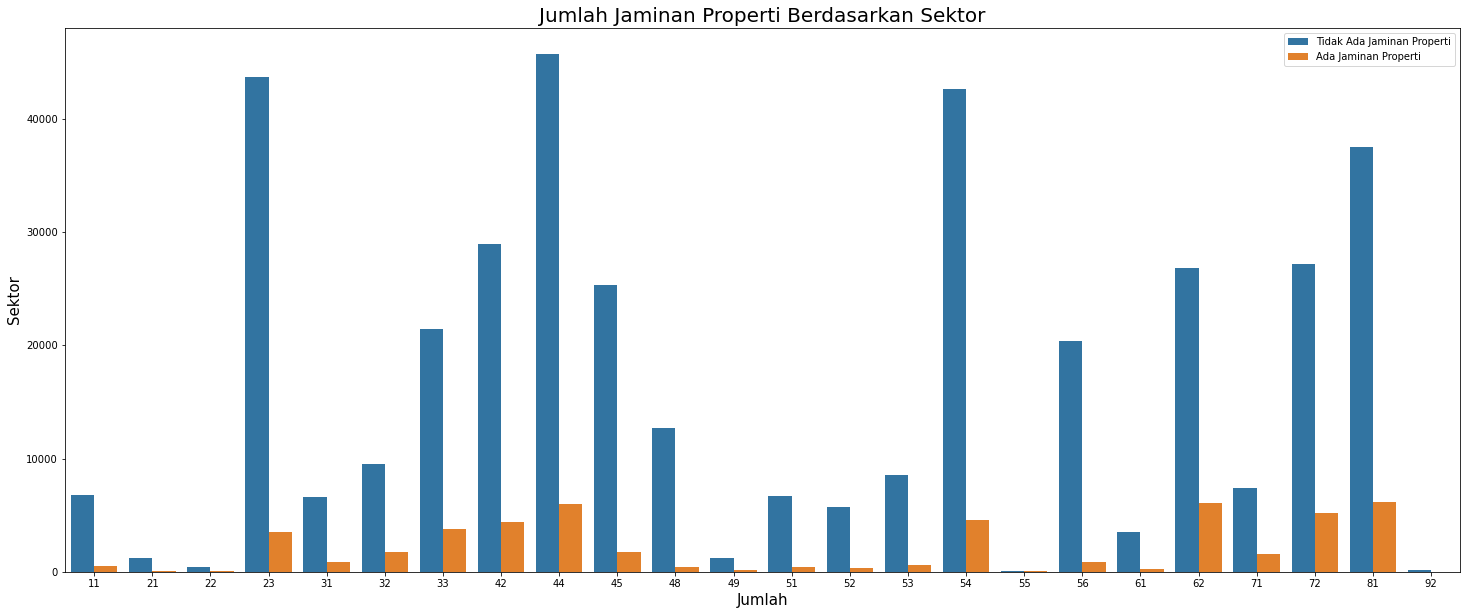

In [16]:
# Jumlah Jaminan Properti Berdasarkan Sektor

plt.figure(figsize = (25, 10))
sns.countplot(x = SBA_clean["Sector"], hue = SBA_clean['RealEstate'])
plt.title('Jumlah Jaminan Properti Berdasarkan Sektor', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)
plt.ylabel('Sektor', fontsize=15)
plt.legend(["Tidak Ada Jaminan Properti", "Ada Jaminan Properti"], loc= 0)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


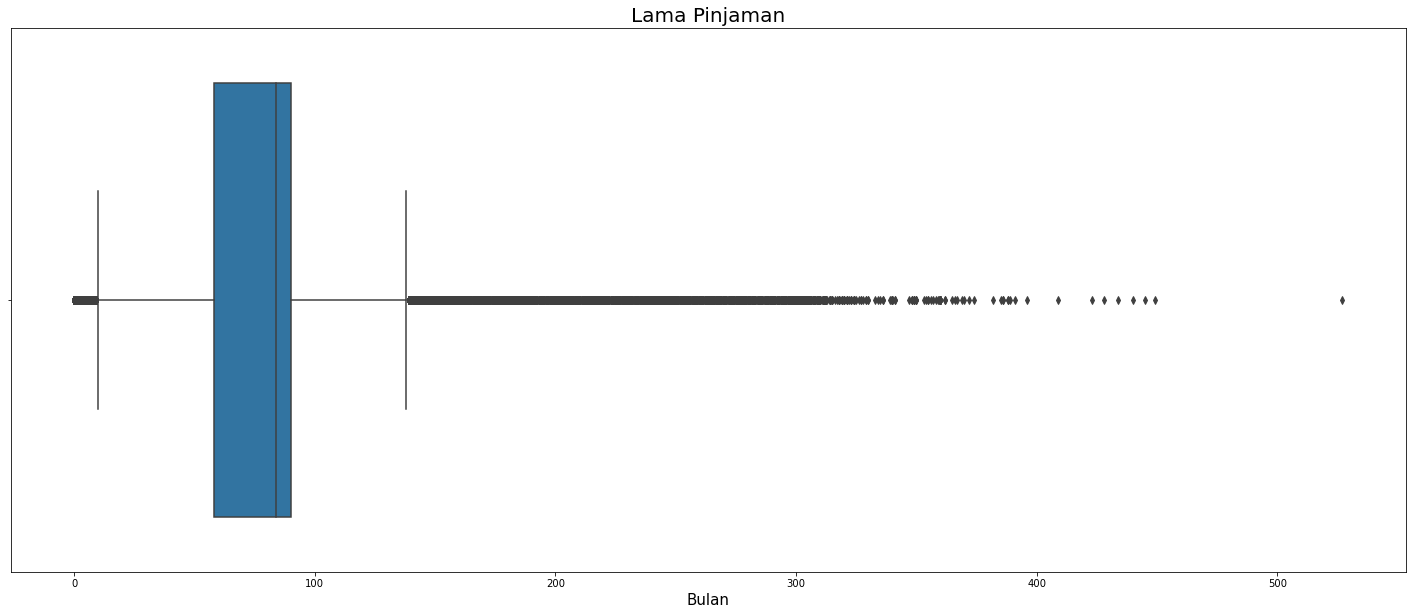

In [17]:
# Boxplot lama pinjaman (dalam Bulan)

plt.figure(figsize = (25, 10))
sns.boxplot(SBA_clean['Term'])
plt.title('Lama Pinjaman', fontsize=20)
plt.xlabel('Bulan', fontsize=15)
plt.show()

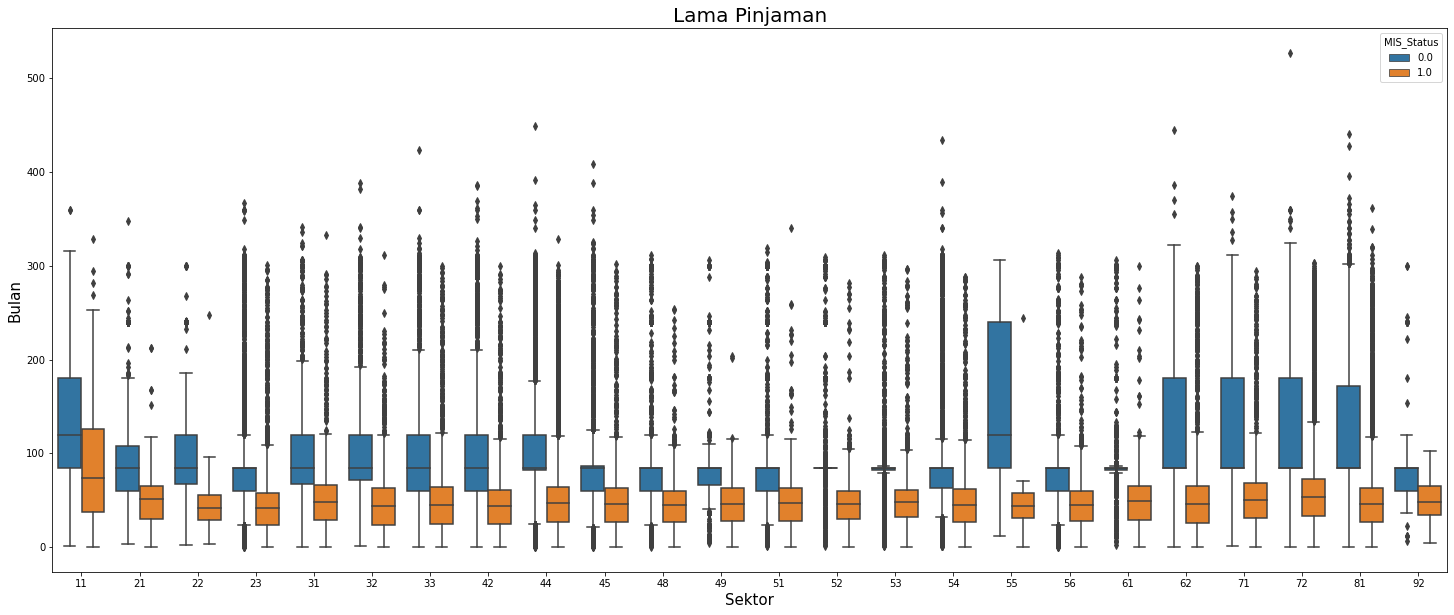

In [18]:
# Boxplot lama pinjaman Berdasarkan Sektor (dalam Bulan)

plt.figure(figsize = (25, 10))
sns.boxplot(x = 'Sector', y = "Term", data = SBA_clean, hue = 'MIS_Status')
plt.title('Lama Pinjaman', fontsize=20)
plt.xlabel('Sektor', fontsize=15)
plt.ylabel('Bulan', fontsize=15)
plt.show()

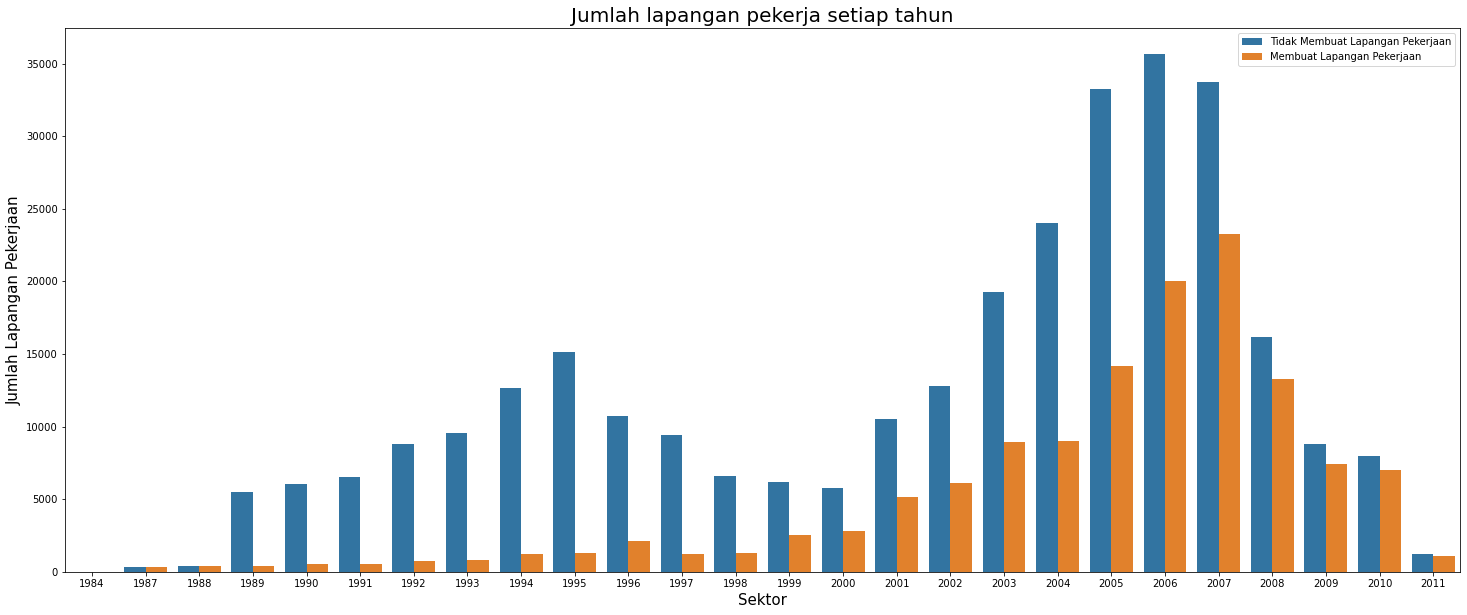

In [19]:
# Jumlah lapangan pekerja setiap tahun

plt.figure(figsize = (25, 10))
sns.countplot(x = 'ApprovalFY', hue = "IsCreatedJob", data = SBA_clean)
plt.title('Jumlah lapangan pekerja setiap tahun', fontsize=20)
plt.xlabel('Sektor', fontsize=15)
plt.ylabel('Jumlah Lapangan Pekerjaan', fontsize=15)
plt.legend(["Tidak Membuat Lapangan Pekerjaan", "Membuat Lapangan Pekerjaan"], loc = 0)
plt.show()

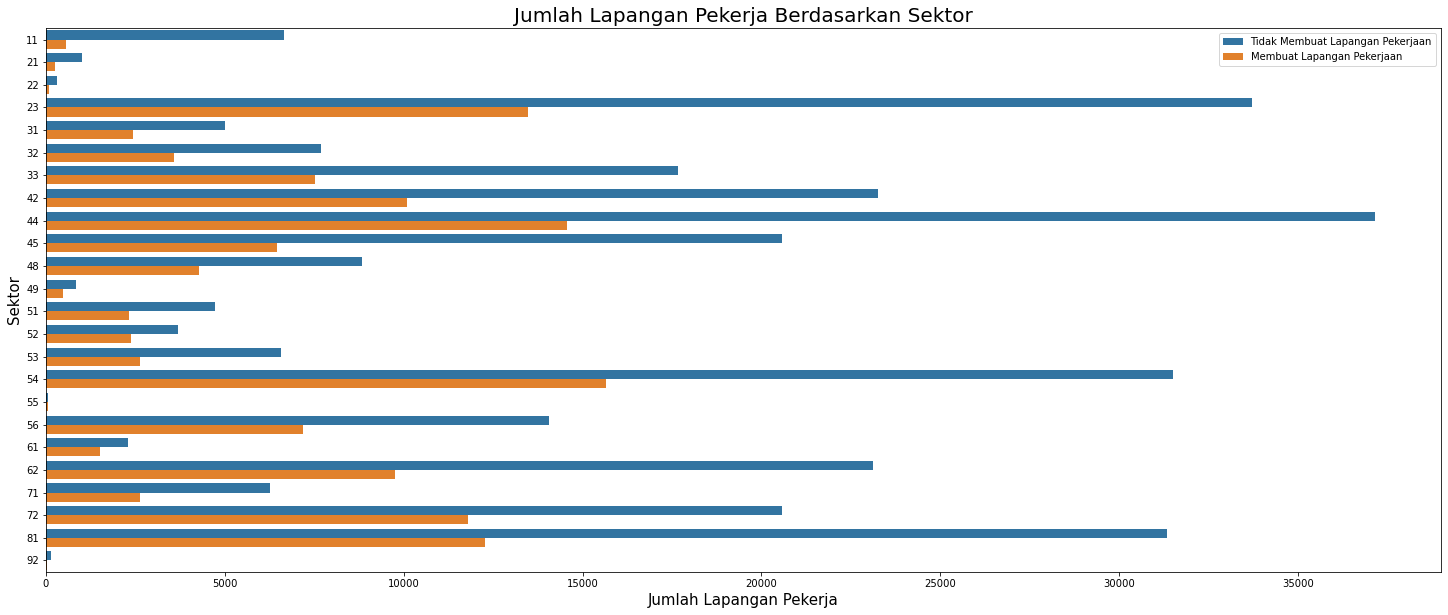

In [20]:
# Jumlah lapangan pekerja berdasarkan sektor
plt.figure(figsize = (25, 10))
sns.countplot(y = "Sector", hue = "IsCreatedJob", data = SBA_clean)
plt.title('Jumlah Lapangan Pekerja Berdasarkan Sektor', fontsize=20)
plt.xlabel('Jumlah Lapangan Pekerja', fontsize=15)
plt.ylabel('Sektor', fontsize=15)
plt.legend(["Tidak Membuat Lapangan Pekerjaan", "Membuat Lapangan Pekerjaan"], loc = 0)
plt.show()

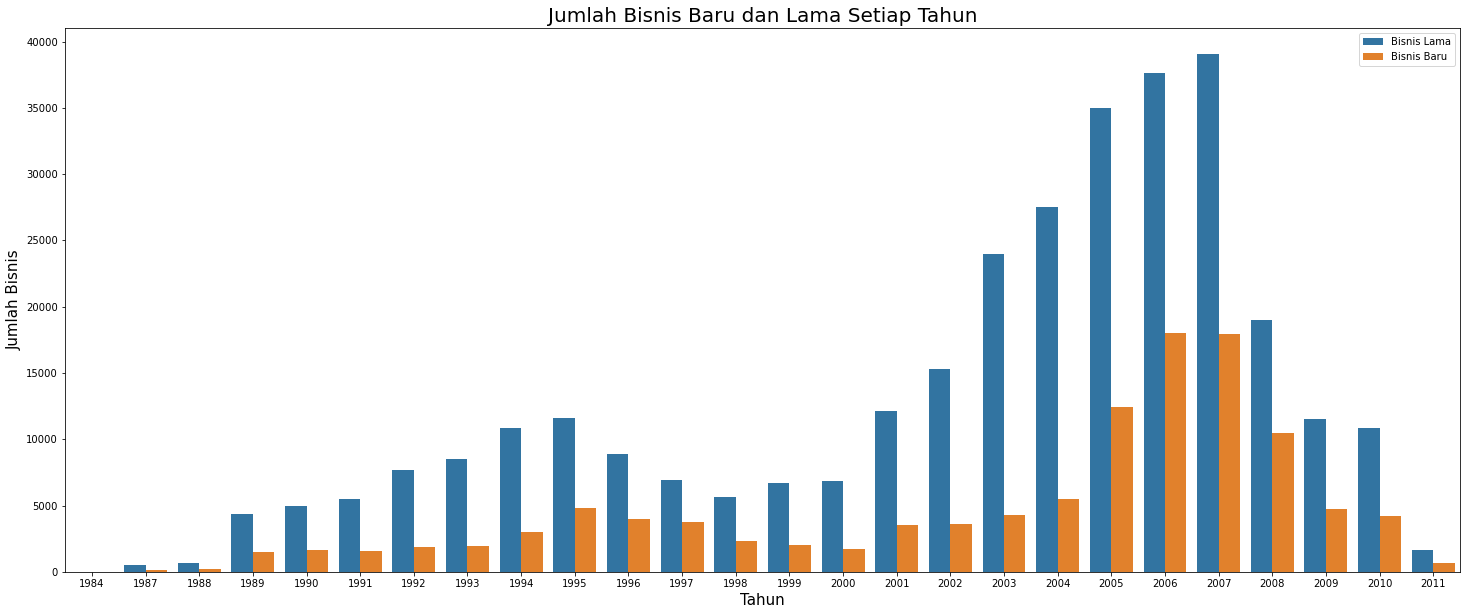

In [21]:
# Jumlah Bisnis Baru dan Lama yang mengikuti SBA setiap tahun
plt.figure(figsize = (25, 10))
sns.countplot(x = "ApprovalFY", hue = 'NewExist', data = SBA_clean)
plt.title('Jumlah Bisnis Baru dan Lama Setiap Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Jumlah Bisnis', fontsize=15)
plt.legend(["Bisnis Lama", "Bisnis Baru"], loc = 0)
plt.show()

## State

In [22]:
State_PIF = SBA_clean[SBA_clean['MIS_Status'] == 0].groupby('State').count()[['MIS_Status']].reset_index()
State_CHGOFF = SBA_clean[SBA_clean['MIS_Status'] == 1].groupby('State').count()[['MIS_Status']].reset_index()

State_MIS_Status = pd.merge(State_PIF, State_CHGOFF, on = 'State')
State_MIS_Status.rename(columns={'MIS_Status_x':'P I F','MIS_Status_y':'CHGOFF'}, inplace=True)

State_MIS_Status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   P I F   51 non-null     int64 
 2   CHGOFF  51 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [23]:
State_MIS_Status.head()

,State,P I F,CHGOFF
0,AK,980,95
1,AL,3200,805
2,AR,2422,528
3,AZ,5124,2474
4,CA,43077,16146


In [24]:
State_MIS_Status['Percentage_CHGOFF'] = 0
for i in range(50) :
    State_MIS_Status['Percentage_CHGOFF'][i] = (State_MIS_Status['CHGOFF'][i]) / (State_MIS_Status['P I F'][i] + State_MIS_Status['CHGOFF'][i])*100

<ipython-input-24-c073ea7de941>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  State_MIS_Status['Percentage_CHGOFF'][i] = (State_MIS_Status['CHGOFF'][i]) / (State_MIS_Status['P I F'][i] + State_MIS_Status['CHGOFF'][i])*100


In [25]:
State_MIS_Status.sort_values('Percentage_CHGOFF', ascending = False)
State_MIS_Status.head()

,State,P I F,CHGOFF,Percentage_CHGOFF
0,AK,980,95,8
1,AL,3200,805,20
2,AR,2422,528,17
3,AZ,5124,2474,32
4,CA,43077,16146,27


In [26]:
staterate_dict = {}

for i in range(len(State_MIS_Status)) :
    staterate_dict[State_MIS_Status['State'][i]] = State_MIS_Status['Percentage_CHGOFF'][i]

In [27]:
staterate_dict

{'AK': 8,
 'AL': 20,
 'AR': 17,
 'AZ': 32,
 'CA': 27,
 'CO': 23,
 'CT': 16,
 'DC': 21,
 'DE': 22,
 'FL': 33,
 'GA': 30,
 'HI': 18,
 'IA': 10,
 'ID': 17,
 'IL': 28,
 'IN': 20,
 'KS': 12,
 'KY': 21,
 'LA': 19,
 'MA': 16,
 'MD': 21,
 'ME': 11,
 'MI': 29,
 'MN': 15,
 'MO': 17,
 'MS': 15,
 'MT': 6,
 'NC': 22,
 'ND': 6,
 'NE': 10,
 'NH': 13,
 'NJ': 28,
 'NM': 11,
 'NV': 31,
 'NY': 24,
 'OH': 20,
 'OK': 16,
 'OR': 20,
 'PA': 17,
 'RI': 14,
 'SC': 24,
 'SD': 7,
 'TN': 22,
 'TX': 21,
 'UT': 23,
 'VA': 22,
 'VT': 8,
 'WA': 18,
 'WI': 14,
 'WV': 15,
 'WY': 0}

In [28]:
def state_def_rate(x) :
    staterate_dict = {'AK': 8, 'AL': 20, 'AR': 17, 'AZ': 32, 'CA': 27, 'CO': 23, 'CT': 16, 'DC': 21, 'DE': 22, 'FL': 33, 'GA': 30,
 'HI': 18, 'IA': 10, 'ID': 17, 'IL': 28, 'IN': 20, 'KS': 12, 'KY': 21, 'LA': 19, 'MA': 16, 'MD': 21, 'ME': 11, 'MI': 29, 'MN': 15,
 'MO': 17, 'MS': 15, 'MT': 6, 'NC': 22, 'ND': 6, 'NE': 10, 'NH': 13, 'NJ': 28, 'NM': 11, 'NV': 31, 'NY': 24, 'OH': 20, 'OK': 16,
 'OR': 20, 'PA': 17, 'RI': 14, 'SC': 24, 'SD': 7, 'TN': 22, 'TX': 21, 'UT': 23, 'VA': 22, 'VT': 8, 'WA': 18, 'WI': 14, 'WV': 15,
 'WY': 0}
    if x in staterate_dict:
        return staterate_dict[x]

In [29]:
SBA_clean.State.apply(state_def_rate)

0         20
1         20
2         20
3         16
4         33
          ..
439115    21
439116    27
439117    27
439118    20
439119    27
Name: State, Length: 439120, dtype: int64

In [30]:
SBA_clean['State_rate'] = SBA_clean.State.apply(state_def_rate)

In [31]:
SBA_clean['State'].isna().sum()

0

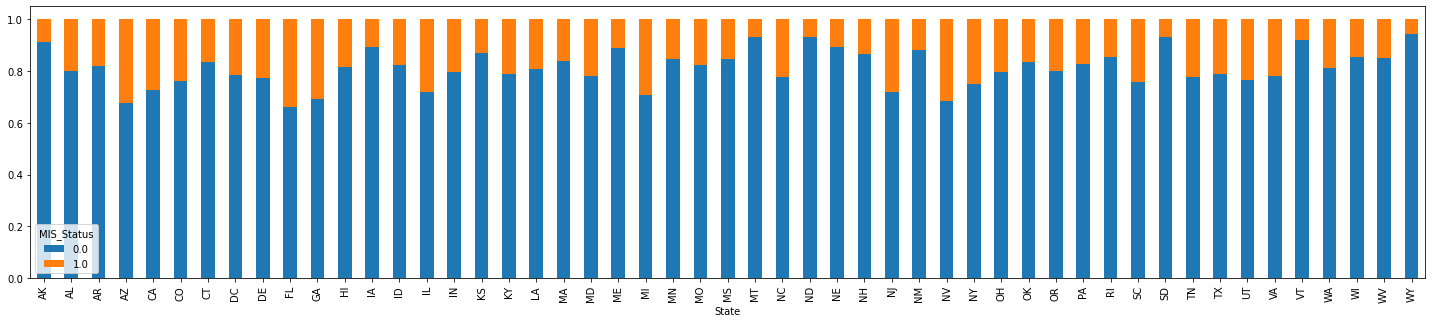

In [32]:
pd.crosstab(SBA_clean['State'], SBA_clean['MIS_Status'], normalize=0).plot(kind='bar', stacked=True, figsize = (25,5))

 #cttn
 3   State       ------    
 5   Sector      -------      
 8   Term ----                
 9   NoEmp              ---xx  
 10  NewExist           ---xx
 11  IsCreatedJob         ---xx
 12  IsRetainedJob         ----
 13  IsFranchised         ---xx
 14  UrbanRural           : ---xx
 15  RevLineCr           ---
 16  LowDoc             ---xx
 18  DisbursementGross ---- 
 20  MIS_Status         -----
 22  GrAppv             -----
 23  SBA_Appv           -----
 24  RealEstate           ---xx
 25  Recession            ----
 26  SectorRate         ----
     State_rate          ----

### Perhatikan outlier dari DisbursementGross, GrAppv, Term, NoEmp (Numerical)

In [33]:
def IQR(x) :
    Q1 = SBA_clean[x].quantile(0.25)
    Q3 = SBA_clean[x].quantile(0.75)
    IQR = Q3 - Q1
    return IQR

def batas_bawah(x) :
    batas_bawah = SBA_clean[x].quantile(0.25) - (IQR(x) * 1.5)
    return batas_bawah

def batas_atas(x) :
    batas_atas = SBA_clean[x].quantile(0.75) + (IQR(x) * 1.5)
    return batas_atas


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


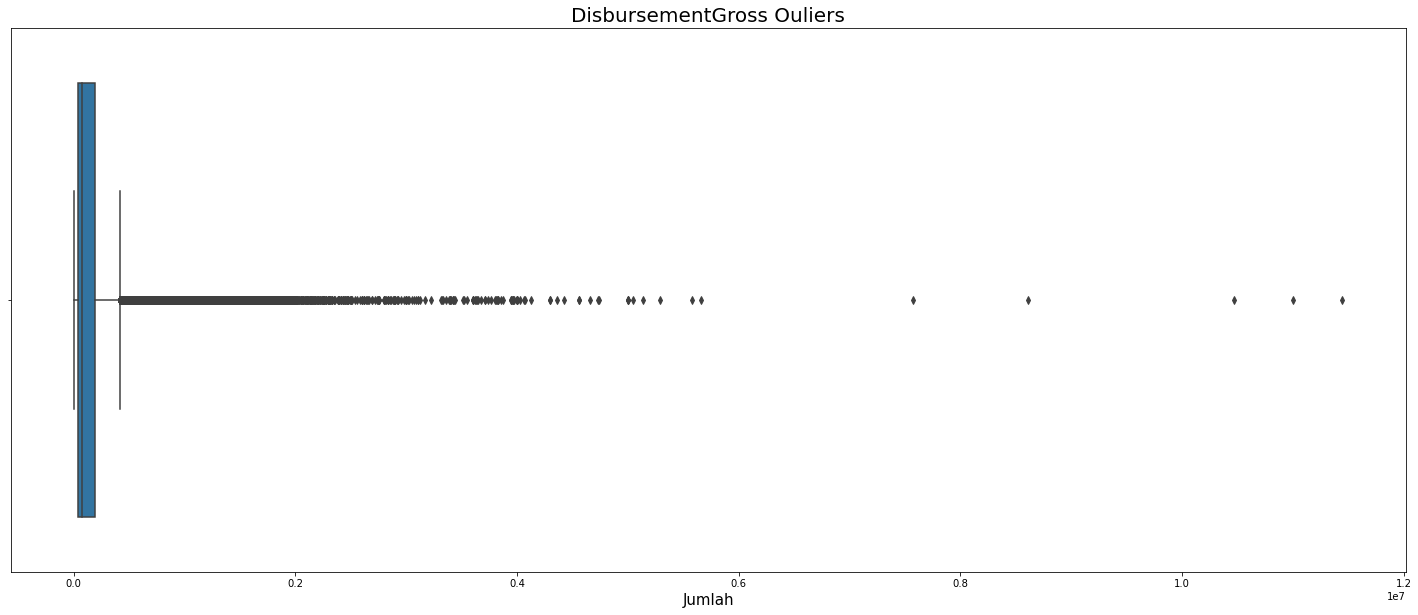

In [34]:
# Akan dicari outlier dari DisbursementGross
plt.figure(figsize = (25, 10))
sns.boxplot(SBA_clean['DisbursementGross'])
plt.title('DisbursementGross Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)
plt.show()

In [35]:
a = 'DisbursementGross'
print(f'Batas bawah {batas_bawah(a)}')
print(f'Batas atas {batas_atas(a)}')
print('Lower Limit: {} %'.format(SBA_clean[(SBA_clean[a] <= batas_bawah(a))].shape[0]/ SBA_clean.shape[0]*100))
print('Upper Limit: {} %'.format(SBA_clean[(SBA_clean[a] >= batas_atas(a))].shape[0]/ SBA_clean.shape[0]*100))

Batas bawah -194500.0
Batas atas 417500.0
Lower Limit: 0.0 %
Upper Limit: 10.002277281836399 %


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


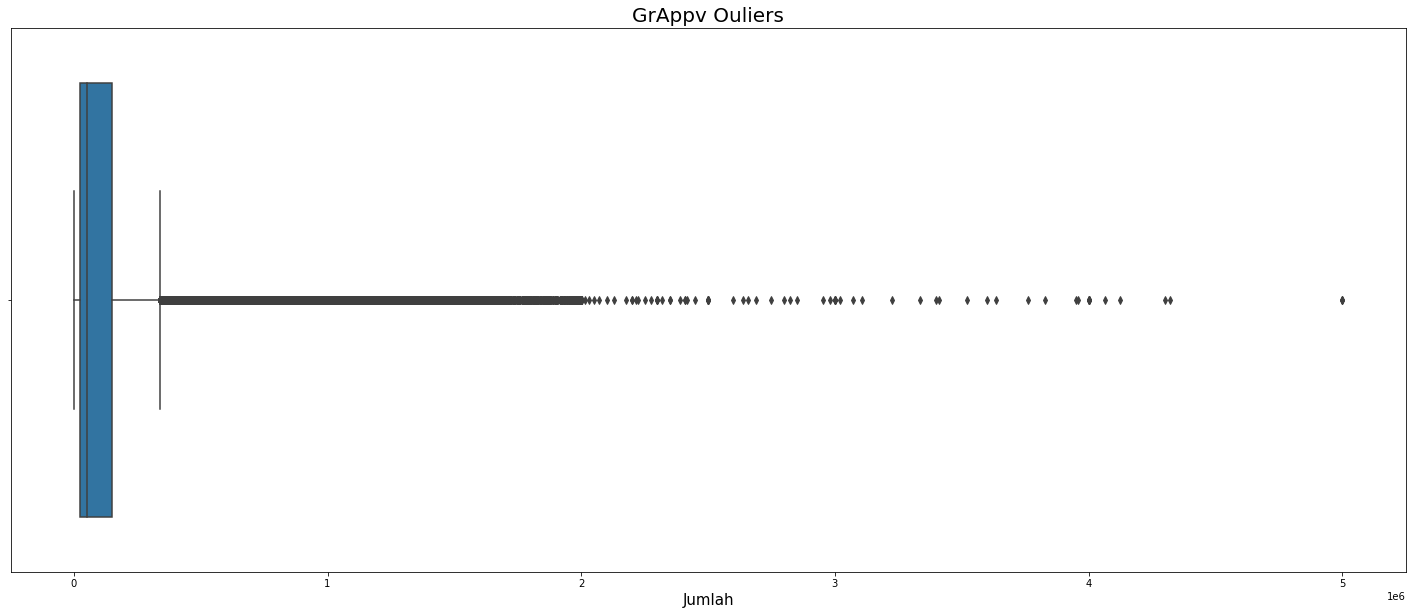

In [36]:
# Akan dicari outlier dari GrAppv
plt.figure(figsize = (25, 10))
sns.boxplot(SBA_clean['GrAppv'])
plt.title('GrAppv Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)
plt.show()

In [37]:
a = 'GrAppv'
print(f'Batas bawah {batas_bawah(a)}')
print(f'Batas atas {batas_atas(a)}')
print('Lower Limit: {} %'.format(SBA_clean[(SBA_clean[a] <= batas_bawah(a))].shape[0]/ SBA_clean.shape[0]*100))
print('Upper Limit: {} %'.format(SBA_clean[(SBA_clean[a] >= batas_atas(a))].shape[0]/ SBA_clean.shape[0]*100))

Batas bawah -164000.0
Batas atas 340000.0
Lower Limit: 0.0 %
Upper Limit: 12.073920568409546 %


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


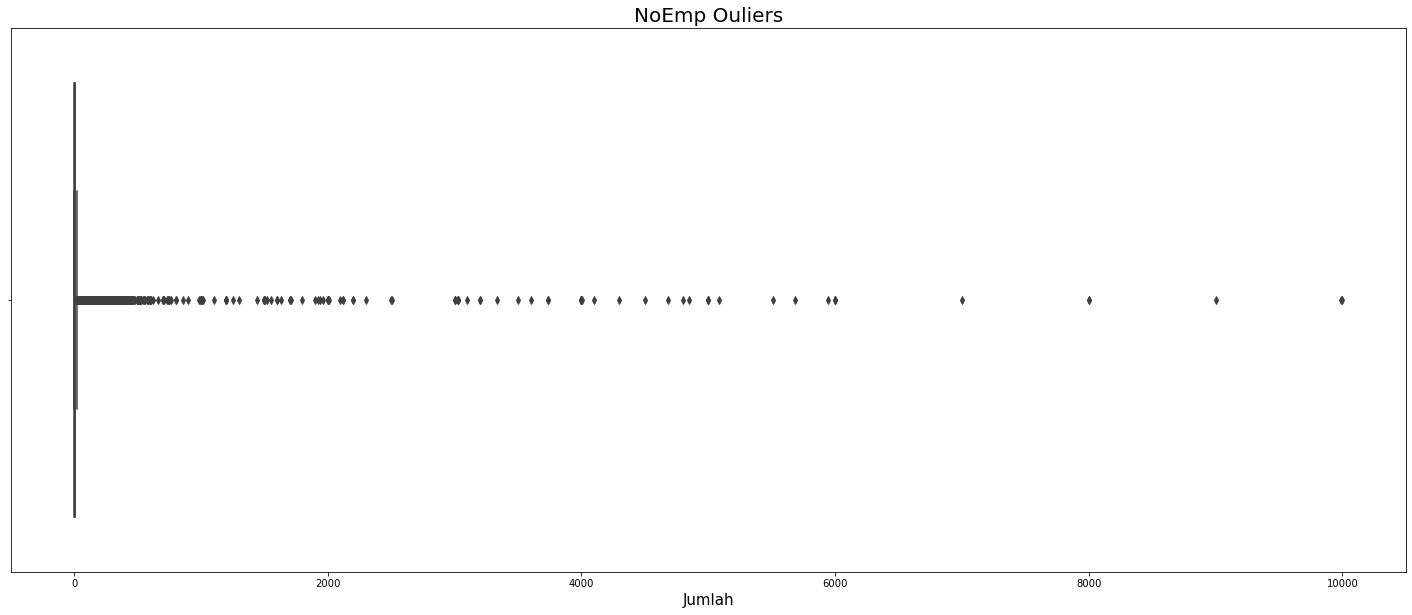

In [38]:
# Akan dicari outlier dari NoEmp
plt.figure(figsize = (25, 10))
sns.boxplot(SBA_clean['NoEmp'])
plt.title('NoEmp Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)
plt.show()

In [39]:
a = 'NoEmp'
print(f'Batas bawah {batas_bawah(a)}')
print(f'Batas atas {batas_atas(a)}')
print('Lower Limit: {} %'.format(SBA_clean[(SBA_clean[a] <= batas_bawah(a))].shape[0]/ SBA_clean.shape[0]*100))
print('Upper Limit: {} %'.format(SBA_clean[(SBA_clean[a] >= batas_atas(a))].shape[0]/ SBA_clean.shape[0]*100))

Batas bawah -8.5
Batas atas 19.5
Lower Limit: 0.0 %
Upper Limit: 11.190790672253598 %


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


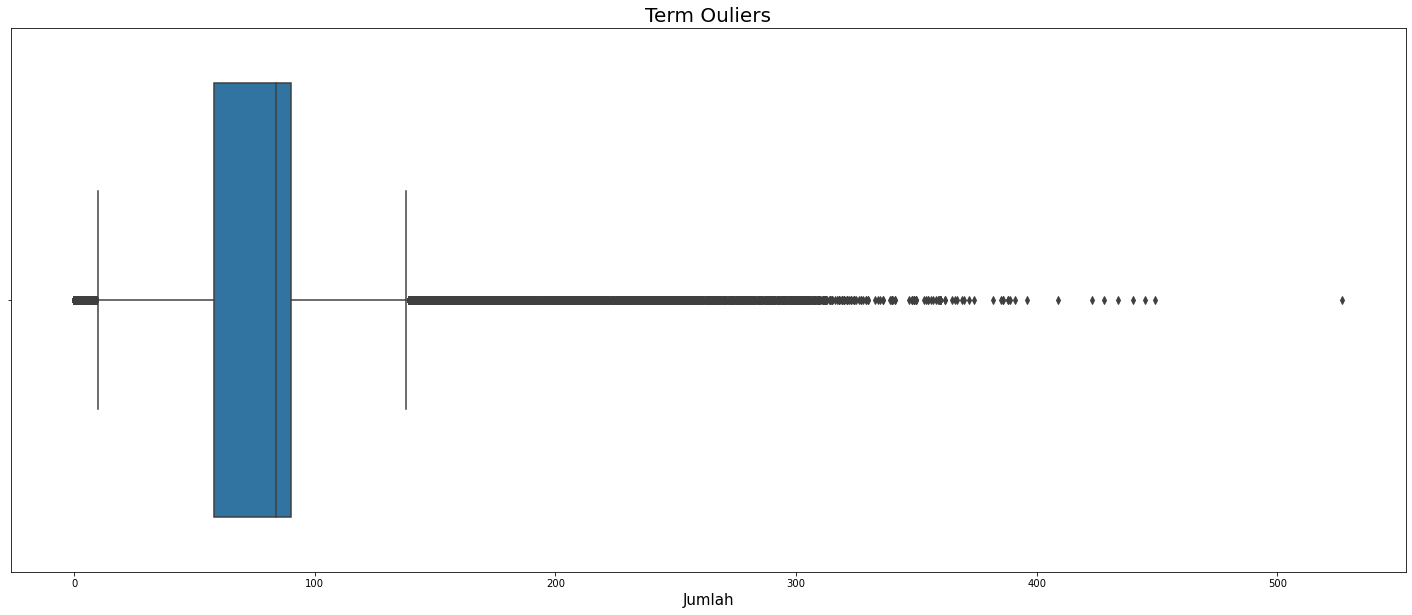

In [40]:
# Akan dicari outlier dari Term
plt.figure(figsize = (25, 10))
sns.boxplot(SBA_clean['Term'])
plt.title('Term Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)
plt.show()

In [41]:
a = 'Term'
print(f'Batas bawah {batas_bawah(a)}')
print(f'Batas atas {batas_atas(a)}')
print('Lower Limit: {} %'.format(SBA_clean[(SBA_clean[a] <= batas_bawah(a))].shape[0]/ SBA_clean.shape[0]*100))
print('Upper Limit: {} %'.format(SBA_clean[(SBA_clean[a] >= batas_atas(a))].shape[0]/ SBA_clean.shape[0]*100))

Batas bawah 10.0
Batas atas 138.0
Lower Limit: 2.892831116779013 %
Upper Limit: 15.676352705410821 %


## Drop

##### Akan di drop kolom yang diabaikan
##### Unnamed: 0         : diabaikan karena sudah ada index  
##### LoanNr_ChkDgt      : diabaikan karena hanya id dari peminjam, sudah digantikan dengan index
##### City, Zip, UrbanRural, State : diabaikan karena akan menggunakan StateRate sebagai pengaruh lokasi terhadap MIS_Status  
##### Sector             : diabaikan karena akan menggunakan Sector_rate sebagai pengaruh sektor terhadap MIS_Status
##### ApprovalDate, ApprovalFY, DisbursementDate : diabaikan karena pencatatan tanggal saja
##### BalanceGross, ChgOffPrinGr : diabaikan karena tidak dibahas lebih lanjut di jurnal Should This Loan be Approved or Denied?”: A Large Dataset with Class Assignment Guidelines

In [42]:
SBA_clean_fix = SBA_clean.drop(columns = ['Unnamed: 0', 'LoanNr_ChkDgt','City', 'Zip', 'UrbanRural', 'State', 'Sector',
                                    'ApprovalDate', 'ApprovalFY','DisbursementDate','BalanceGross', 'ChgOffPrinGr'], axis =1)

In [43]:
SBA_clean_fix.head()

,Term,NoEmp,NewExist,IsCreatedJob,IsRetainedJob,IsFranchised,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,RealEstate,Recession,SectorRate,State_rate
0,84,4,1.0,0,0,0,0.0,1.0,60000.0,0.0,60000.0,48000.0,0,0,0.23,20
1,60,2,1.0,0,0,0,0.0,1.0,40000.0,0.0,40000.0,32000.0,0,0,0.22,20
2,180,7,0.0,0,0,0,0.0,0.0,287000.0,0.0,287000.0,215250.0,0,0,0.10,20
3,120,19,0.0,0,0,0,0.0,0.0,517000.0,0.0,517000.0,387750.0,0,0,0.14,16
4,84,1,1.0,0,0,0,0.0,1.0,45000.0,0.0,45000.0,36000.0,0,0,0.20,33


In [44]:
SBA_clean_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439120 entries, 0 to 439119
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               439120 non-null  int64  
 1   NoEmp              439120 non-null  int64  
 2   NewExist           439120 non-null  float64
 3   IsCreatedJob       439120 non-null  int64  
 4   IsRetainedJob      439120 non-null  int64  
 5   IsFranchised       439120 non-null  int64  
 6   RevLineCr          439120 non-null  float64
 7   LowDoc             439120 non-null  float64
 8   DisbursementGross  439120 non-null  float64
 9   MIS_Status         439120 non-null  float64
 10  GrAppv             439120 non-null  float64
 11  SBA_Appv           439120 non-null  float64
 12  RealEstate         439120 non-null  int64  
 13  Recession          439120 non-null  int64  
 14  SectorRate         439120 non-null  float64
 15  State_rate         439120 non-null  int64  
dtypes:

In [52]:
# Karena memiliki jumlah input yang sangat banyak, maka akan digunakan teknik feature importance pada feature selection 
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from xgboost import XGBClassifier

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


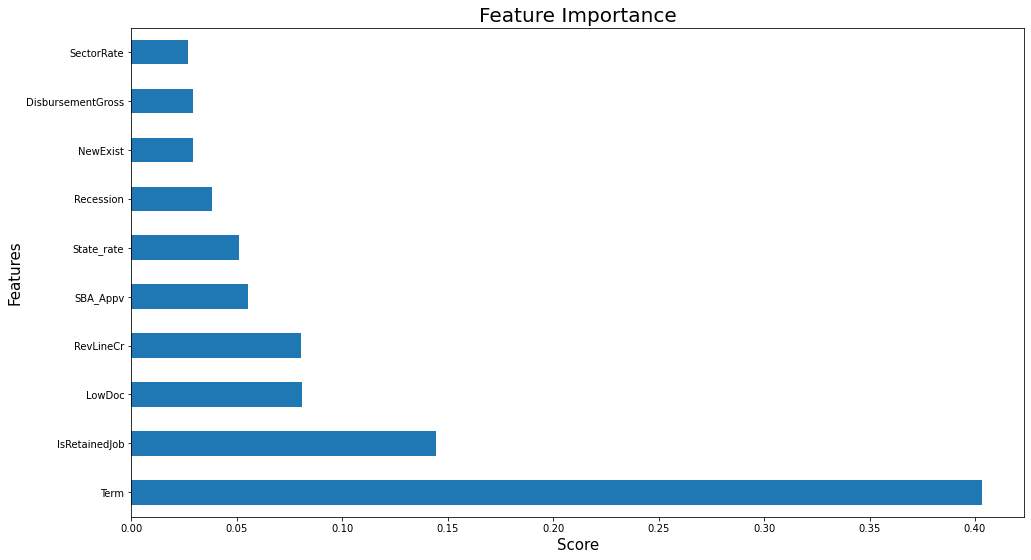

In [46]:
y = SBA_clean_fix['MIS_Status']
X = SBA_clean_fix.drop(columns=['MIS_Status'], axis=1)

model = XGBClassifier()
model.fit(X,y)

#Kita visualisasi feature yang penting-penting
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
f, ax = plt.subplots(figsize=(16,9))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

In [47]:
SBA_Final = SBA_clean_fix.drop(columns = ['NoEmp', 'IsCreatedJob', 'IsFranchised', 'GrAppv', 'RealEstate' ], axis =1)

In [48]:
SBA_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439120 entries, 0 to 439119
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               439120 non-null  int64  
 1   NewExist           439120 non-null  float64
 2   IsRetainedJob      439120 non-null  int64  
 3   RevLineCr          439120 non-null  float64
 4   LowDoc             439120 non-null  float64
 5   DisbursementGross  439120 non-null  float64
 6   MIS_Status         439120 non-null  float64
 7   SBA_Appv           439120 non-null  float64
 8   Recession          439120 non-null  int64  
 9   SectorRate         439120 non-null  float64
 10  State_rate         439120 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 36.9 MB


In [51]:
# export SBA to csv
SBA_Final.to_csv('SBA_fix.csv')